# 🏡 California Housing Price Prediction using Machine Learning

**Author:** Kishlaya Sinha  
**GitHub:** [Kishlaya20sinha](https://github.com/Kishlaya20sinha)

This project uses Scikit-learn and regression algorithms to predict housing prices based on California census data.
It includes data preprocessing, EDA, multiple ML models, evaluation metrics, and visualizations.


In [1]:
import pandas as pd
import numpy as np

In [2]:
housing = pd.read_csv("housing.csv")

In [3]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [6]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


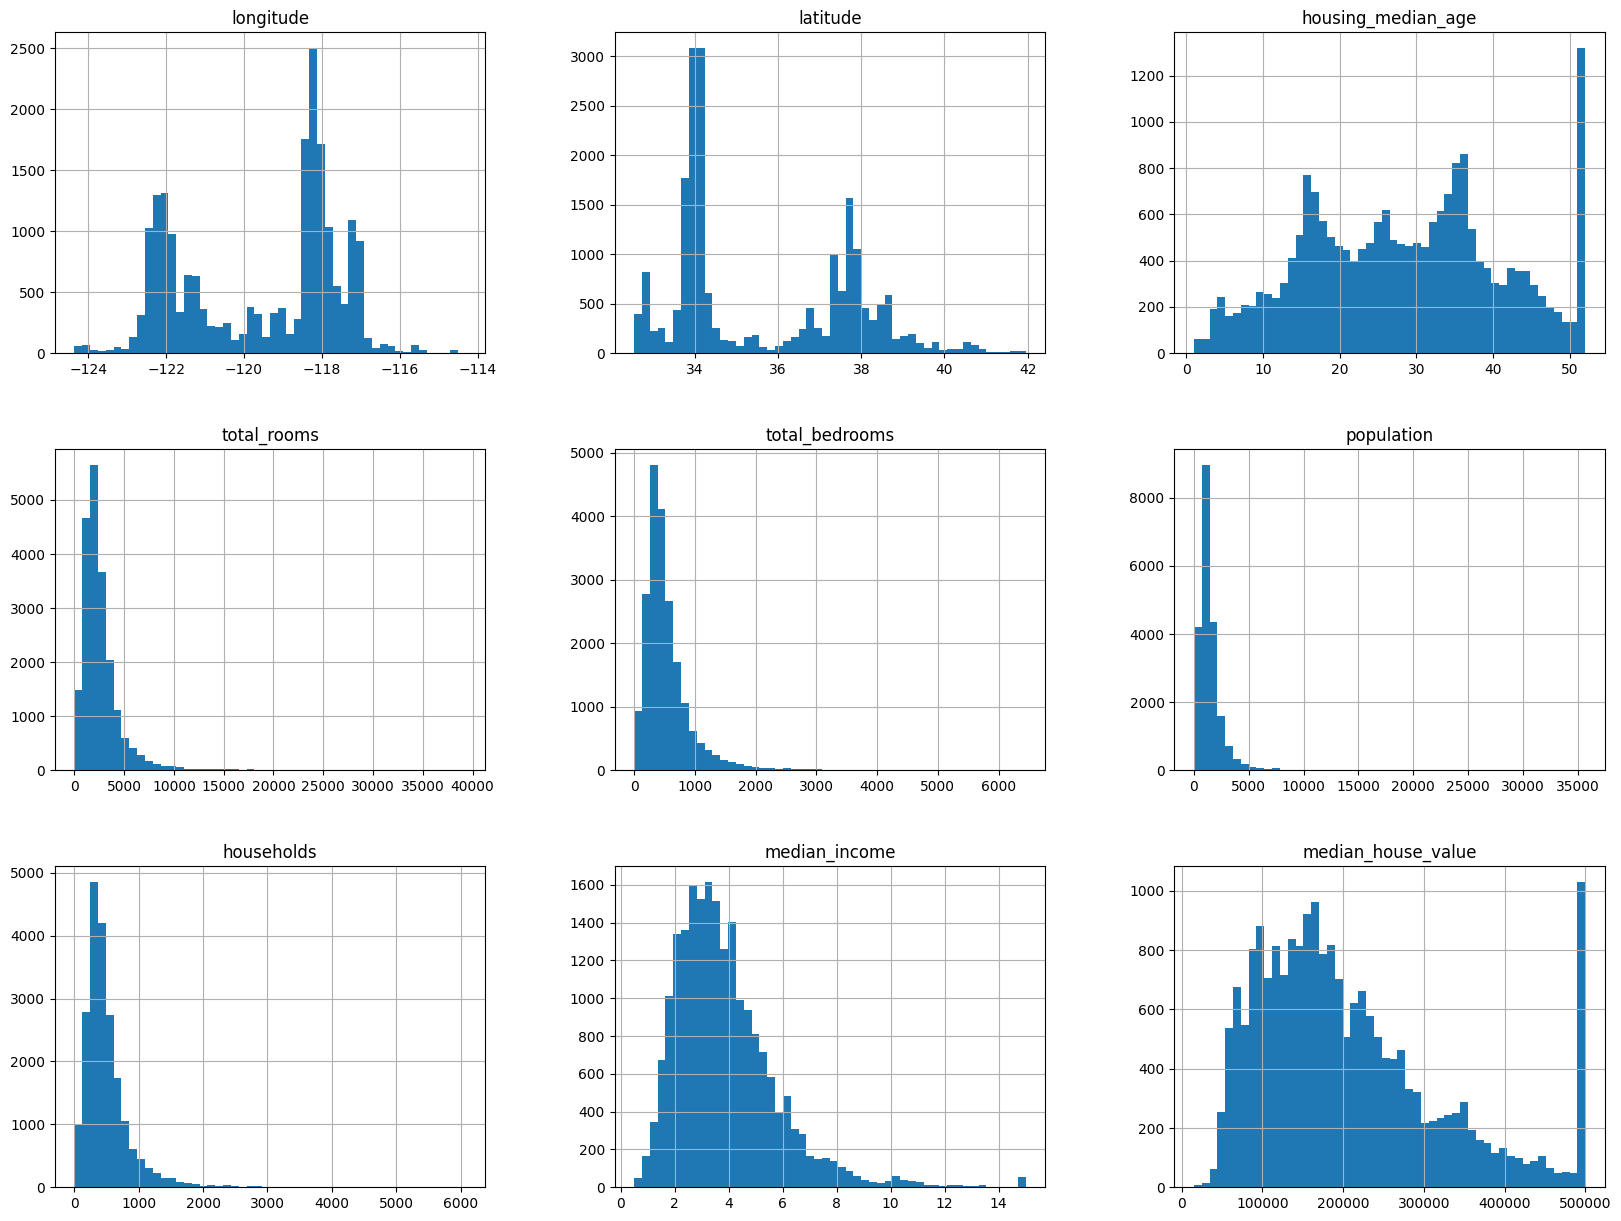

In [7]:
 %matplotlib inline   
 import matplotlib.pyplot as plt
 housing.hist(bins=50, figsize=(20,15))
 plt.show()

In [8]:
housing = housing.reset_index(drop=True)


In [9]:
 housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)
 housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)

C:\Users\sitab\AppData\Local\Temp\ipykernel_21568\2908040449.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)


In [10]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [11]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

income_cat
3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114341
1.0    0.039971
Name: count, dtype: float64

In [12]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

<Axes: xlabel='longitude', ylabel='latitude'>

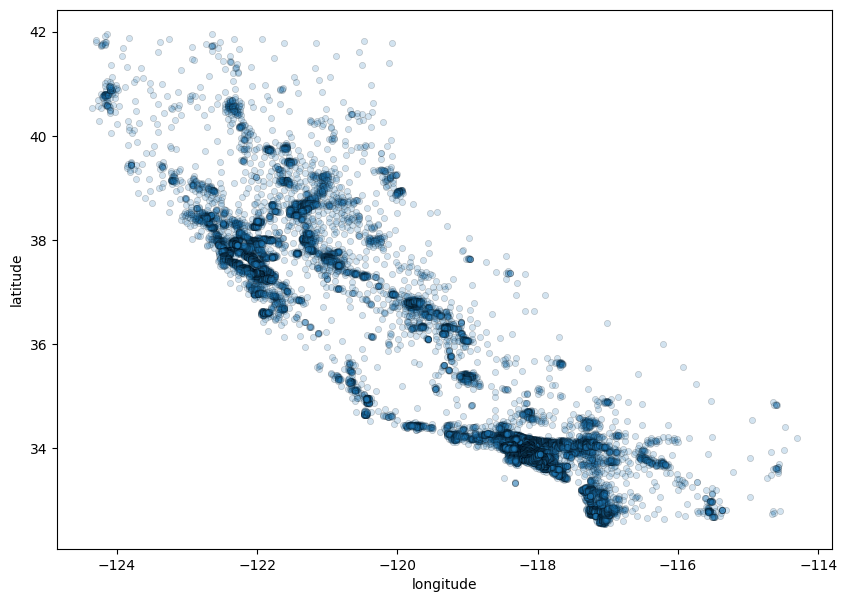

In [13]:
housing.plot(kind="scatter", x="longitude", y="latitude",edgecolor="black",
    linewidth=0.5,       # Optional: controls outline thickness
    alpha=0.2,         # Optional: make points slightly transparent
    figsize=(10, 7))

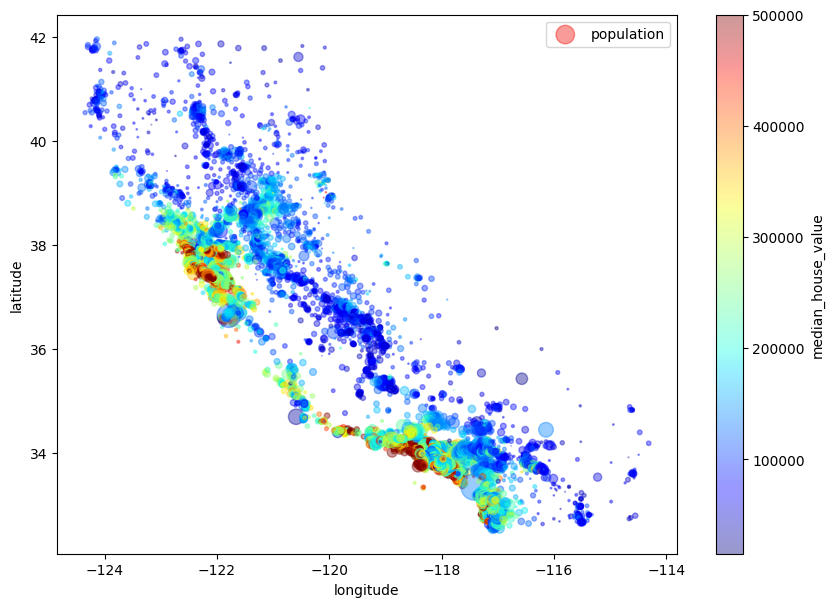

In [14]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=housing["population"]/100, label="population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
 )
plt.legend()

In [15]:
numeric_housing = housing.select_dtypes(include=["float64", "int64"])


In [16]:
corr_matrix = numeric_housing.corr()

In [17]:
 corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
income_cat            0.643892
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

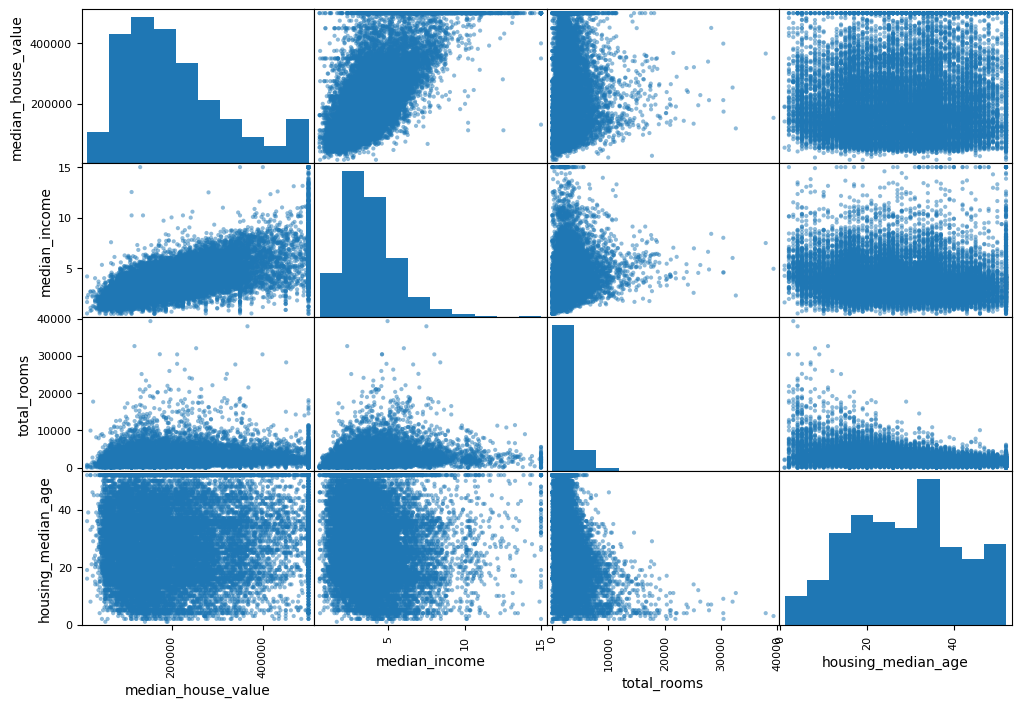

In [18]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms",
 "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))

<Axes: xlabel='median_income', ylabel='median_house_value'>

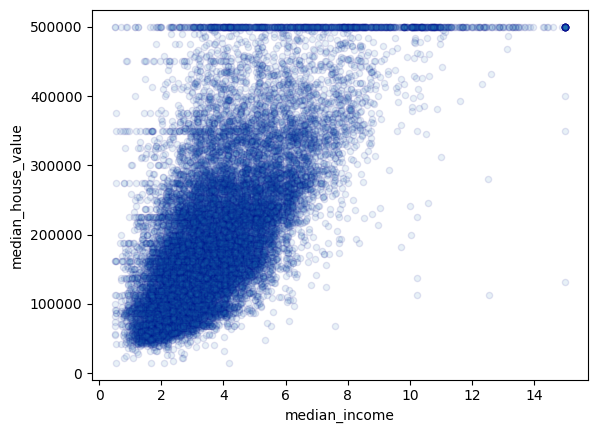

In [19]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",edgecolor="darkblue",
 alpha=0.1)

In [20]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [21]:
numeric_housing = housing.select_dtypes(include=["float64", "int64"])


In [22]:
 corr_matrix = numeric_housing.corr()

In [23]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
income_cat                  0.643892
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

In [24]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

In [25]:
 imputer.fit(numeric_housing)


SimpleImputer(strategy='median')

In [26]:
 imputer.statistics_

array([-1.18490000e+02,  3.42600000e+01,  2.90000000e+01,  2.12700000e+03,
        4.35000000e+02,  1.16600000e+03,  4.09000000e+02,  3.53480000e+00,
        1.79700000e+05,  3.00000000e+00,  5.22912879e+00,  2.03162434e-01,
        2.81811565e+00])

In [27]:
X = imputer.transform(numeric_housing)

In [28]:
housing_tr = pd.DataFrame(X, columns=numeric_housing.columns)

In [29]:
housing_cat = housing["ocean_proximity"]
housing_cat.sample(10,random_state=42)

20046        INLAND
3024         INLAND
15663      NEAR BAY
20484     <1H OCEAN
9814     NEAR OCEAN
13311        INLAND
7113      <1H OCEAN
7668      <1H OCEAN
18246      NEAR BAY
5723      <1H OCEAN
Name: ocean_proximity, dtype: object

In [30]:
housing_cat_encoded, housing_categories = housing_cat.factorize()
housing_cat_encoded[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [31]:
 housing_categories

Index(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'], dtype='object')

In [32]:
housing = strat_train_set.copy()

In [33]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1))
housing_cat_1hot

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 20640 stored elements and shape (20640, 5)>

In [34]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.]], shape=(20640, 5))

In [35]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat.values.reshape(-1, 1))

In [36]:
 cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [37]:
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np  # Make sure numpy is imported if not already

# Indexes of the columns in the dataset
rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True):  # No *args or **kwargs
        self.add_bedrooms_per_room = add_bedrooms_per_room

    def fit(self, X, y=None):
        return self  # Nothing to do

    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

# Usage
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)


In [38]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer  # Use SimpleImputer, not Imputer

# Create the pipeline
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])

# Apply the pipeline to the numeric data
housing_num_tr = num_pipeline.fit_transform(numeric_housing)


In [39]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[self.attribute_names].values


In [40]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer  # Use SimpleImputer instead of deprecated Imputer
from sklearn.preprocessing import StandardScaler

# Define attribute groups
num_attribs = list(numeric_housing)  # assuming housing_num is a DataFrame with numeric features
cat_attribs = ["ocean_proximity"]

# Numerical pipeline
num_pipeline = Pipeline([
    ('selector', DataFrameSelector(num_attribs)),
    ('imputer', SimpleImputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])


In [41]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Categorical pipeline
cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(cat_attribs)),
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore')),
])


In [42]:
num_attribs = [
    'longitude', 'latitude', 'housing_median_age',
    'total_rooms', 'total_bedrooms', 'population',
    'households', 'median_income'
]


In [43]:
# Final full pipeline
full_pipeline = ColumnTransformer([
    ('num', Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ]), num_attribs),

    ('cat', Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore')),
    ]), cat_attribs),
])



In [44]:
housing_prepared = full_pipeline.fit_transform(housing)

In [45]:
housing_prepared

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ...,  0.        ,
         0.        ,  0.        ],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.        ,
         0.        ,  0.        ]], shape=(16512, 16))

In [46]:
 housing_prepared.shape

(16512, 16)

In [47]:
housing_labels = housing["median_house_value"].copy()


In [48]:
 from sklearn.linear_model import LinearRegression
 lin_reg = LinearRegression()
 lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [49]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

np.float64(68627.87390018745)

In [50]:
 from sklearn.tree import DecisionTreeRegressor
 tree_reg = DecisionTreeRegressor()
 tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [51]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

np.float64(0.0)

In [52]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [53]:
def display_scores(scores):
    print("Scores:", scores)    
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())


In [54]:
display_scores(tree_rmse_scores)

Scores: [73385.87244738 70270.49051147 69281.64989492 71534.86634679
 69227.81965169 77445.09213627 71792.61553667 74548.81976075
 69068.02170916 70847.11003648]
Mean: 71740.2358031575
Standard deviation: 2562.0695238654284


In [55]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,                              
scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [71762.76364394 64114.99166359 67771.17124356 68635.19072082
 66846.14089488 72528.03725385 73997.08050233 68802.33629334
 66443.28836884 70139.79923956]
Mean: 69104.07998247063
Standard deviation: 2880.3282098180666


In [56]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import numpy as np

# Create and train the model
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)

# Cross-validation (returns negative MSE, hence the minus sign)
forest_scores = cross_val_score(
    forest_reg, housing_prepared, housing_labels,
    scoring="neg_mean_squared_error", cv=10
)

# Calculate RMSE from the negative MSE
forest_rmse_scores = np.sqrt(-forest_scores)

# Show results
print("Scores:", forest_rmse_scores)
print("Mean:", forest_rmse_scores.mean())
print("Standard deviation:", forest_rmse_scores.std())


Scores: [51349.74915713 48960.59023815 46683.9349757  51690.00163982
 47032.29013448 52471.62901397 52263.64850174 50026.63221935
 48753.80734248 53820.75568882]
Mean: 50305.303891164345
Standard deviation: 2280.6735712278937


In [57]:
%pip install joblib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [58]:
from sklearn.model_selection import GridSearchCV
param_grid = [
{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
{'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
scoring='neg_mean_squared_error')
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             scoring='neg_mean_squared_error')

In [59]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [60]:
grid_search.best_estimator_


RandomForestRegressor(max_features=8, n_estimators=30)

In [61]:
 RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=8, max_leaf_nodes=None, min_impurity_decrease=0.0, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=30, n_jobs=1, oob_score=False, random_state=42,
           verbose=0, warm_start=False)

RandomForestRegressor(criterion='mse', max_features=8, n_estimators=30,
                      n_jobs=1, random_state=42)

In [62]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

64623.153479222245 {'max_features': 2, 'n_estimators': 3}
55541.28612498318 {'max_features': 2, 'n_estimators': 10}
52686.842001824705 {'max_features': 2, 'n_estimators': 30}
59621.50766038986 {'max_features': 4, 'n_estimators': 3}
53339.217441295936 {'max_features': 4, 'n_estimators': 10}
50480.72871010966 {'max_features': 4, 'n_estimators': 30}
57736.39455767707 {'max_features': 6, 'n_estimators': 3}
52308.6880714374 {'max_features': 6, 'n_estimators': 10}
50117.28446417575 {'max_features': 6, 'n_estimators': 30}
58683.471687472746 {'max_features': 8, 'n_estimators': 3}
52080.23117455029 {'max_features': 8, 'n_estimators': 10}
50058.79158941186 {'max_features': 8, 'n_estimators': 30}
62338.93979226337 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54120.05436027695 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60592.53874455884 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52702.00223981644 {'bootstrap': False, 'max_features': 3, 'n_estimators':

In [63]:
feature_importances = grid_search.best_estimator_.feature_importances_

In [64]:
feature_importances

array([6.40033810e-02, 6.22663579e-02, 4.54183598e-02, 1.49529330e-02,
       1.46996926e-02, 1.45929232e-02, 1.46454336e-02, 3.61492257e-01,
       4.45155949e-02, 1.16638093e-01, 8.18605830e-02, 6.30493917e-03,
       1.54326070e-01, 9.26259899e-05, 1.64976956e-03, 2.54098642e-03])

In [65]:
cat_pipeline.fit(housing[cat_attribs])


Pipeline(steps=[('selector',
                 DataFrameSelector(attribute_names=['ocean_proximity'])),
                ('imputer', SimpleImputer(strategy='most_frequent')),
                ('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [66]:
cat_encoder.get_feature_names_out(['ocean_proximity'])


array(['ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'], dtype=object)

In [67]:
cat_encoder = full_pipeline.named_transformers_["cat"].named_steps["onehot"]
cat_one_hot_attribs = list(cat_encoder.get_feature_names_out(['ocean_proximity']))

extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
attributes = num_attribs + extra_attribs + cat_one_hot_attribs

print(attributes)


['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'rooms_per_hhold', 'pop_per_hhold', 'bedrooms_per_room', 'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND', 'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN']


In [68]:
sorted(zip(feature_importances, attributes), reverse=True)

[(np.float64(0.361492257200032), 'median_income'),
 (np.float64(0.15432607034226015), 'ocean_proximity_INLAND'),
 (np.float64(0.11663809250506631), 'pop_per_hhold'),
 (np.float64(0.08186058299768732), 'bedrooms_per_room'),
 (np.float64(0.06400338100751589), 'longitude'),
 (np.float64(0.06226635792245055), 'latitude'),
 (np.float64(0.045418359773136595), 'housing_median_age'),
 (np.float64(0.044515594853605935), 'rooms_per_hhold'),
 (np.float64(0.014952932966923564), 'total_rooms'),
 (np.float64(0.014699692572065905), 'total_bedrooms'),
 (np.float64(0.014645433550371822), 'households'),
 (np.float64(0.014592923180304453), 'population'),
 (np.float64(0.006304939167831644), 'ocean_proximity_<1H OCEAN'),
 (np.float64(0.002540986415500246), 'ocean_proximity_NEAR OCEAN'),
 (np.float64(0.001649769555311035), 'ocean_proximity_NEAR BAY'),
 (np.float64(9.262598993661173e-05), 'ocean_proximity_ISLAND')]

In [69]:
final_model = grid_search.best_estimator_
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()
X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse) 